In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML"
MODEL_PATH = os.path.join(PROJECT_ROOT, "models")
PLOT_PATH = os.path.join(PROJECT_ROOT, "plots")
os.makedirs(PLOT_PATH, exist_ok=True)

main_features = [
    'Number of Affected Users',
    'Incident Resolution Time (in Hours)',
    'Loss_per_User',
    'Attack Type',
    'Target Industry',
    'Attack Source',
    'Security Vulnerability Type',
    'AttackType_TargetIndustry'
]

def plot_feature_importance(raw_imp, model_name):
    # Aggregate dummy features back to main columns
    agg_imp = {}
    for col in main_features:
        matching = [f for f in raw_imp.index if col in f]
        agg_imp[col] = raw_imp[matching].sum() if matching else 0.0
    
    feat_imp = pd.Series(agg_imp).sort_values(ascending=False)
    
    colors = [palette[0]] * len(feat_imp)
    for i in range(min(3, len(feat_imp))):
        colors[i] = palette[2]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=feat_imp.values,
        y=feat_imp.index,
        hue=feat_imp.index,
        palette=colors,
        dodge=False,
        legend=False
    )
    for i, val in enumerate(feat_imp.values):
        ax.text(val + 0.005, i, f"{val:.3f}", va='center', fontsize=8)
    
    plt.title(f"Feature Importances: {model_name}")
    plt.xlabel("Importance Score")
    plt.ylabel("Main Feature")
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    
    # Save image
    save_path = os.path.join(PLOT_PATH, f"{model_name}_feature_importance.png")
    plt.savefig(save_path)
    plt.show()
    print(f"Saved plot to {save_path}")



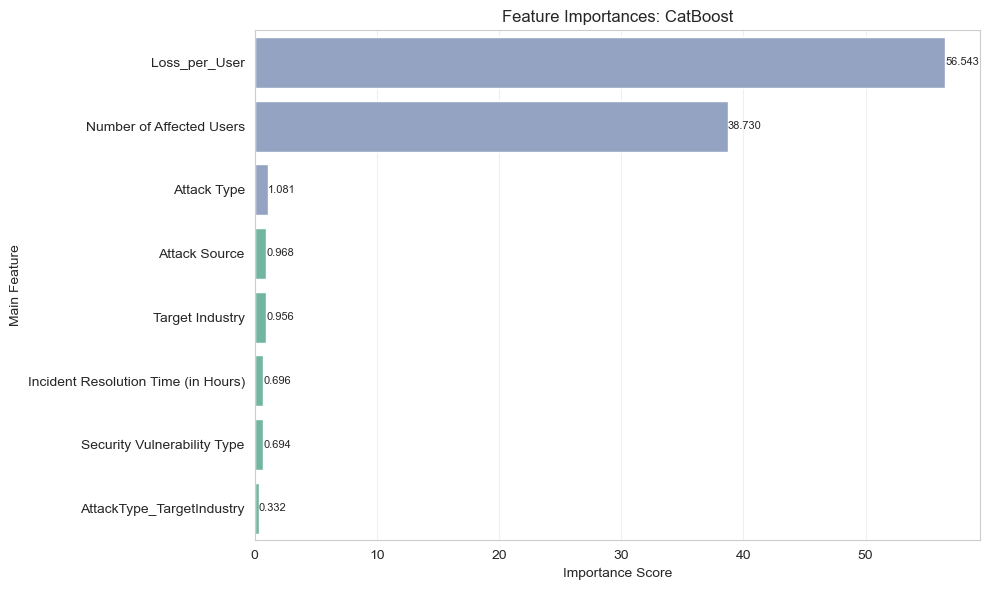

Saved plot to C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML\plots\CatBoost_feature_importance.png


In [6]:
model = joblib.load(os.path.join(MODEL_PATH, "CatBoost_tuned.joblib"))
estimator = [s for s in model.named_steps.values() if hasattr(s, "get_feature_importance")][0]
feat_names = model.named_steps['preprocessor'].get_feature_names_out()
raw_imp = pd.Series(estimator.get_feature_importance(), index=feat_names)
plot_feature_importance(raw_imp, "CatBoost")

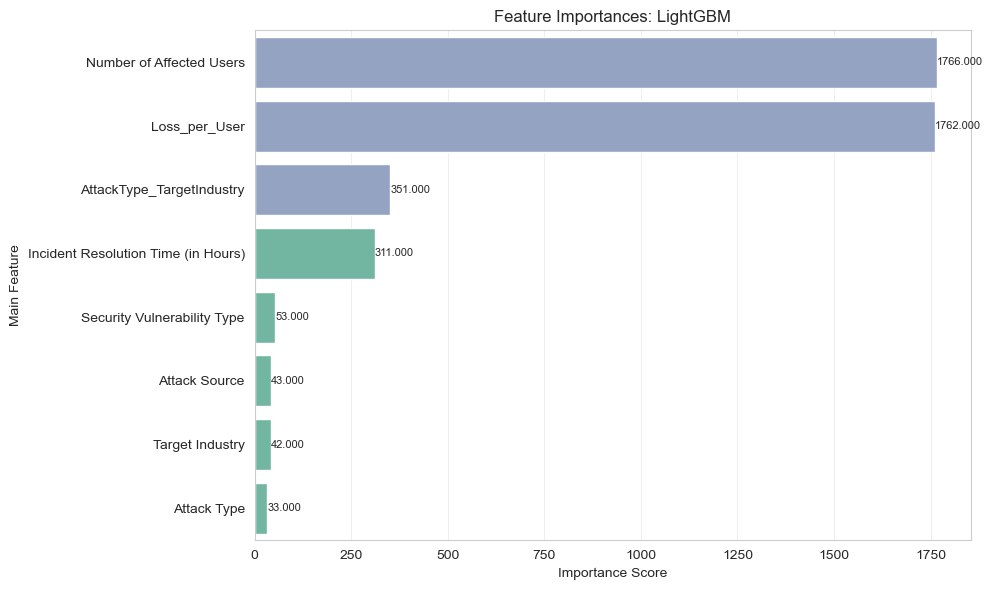

Saved plot to C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML\plots\LightGBM_feature_importance.png


In [7]:
model = joblib.load(os.path.join(MODEL_PATH, "LightGBM_tuned.joblib"))
estimator = [s for s in model.named_steps.values() if hasattr(s, "feature_importances_")][0]
feat_names = model.named_steps['preprocessor'].get_feature_names_out()
raw_imp = pd.Series(estimator.feature_importances_, index=feat_names)
plot_feature_importance(raw_imp, "LightGBM")

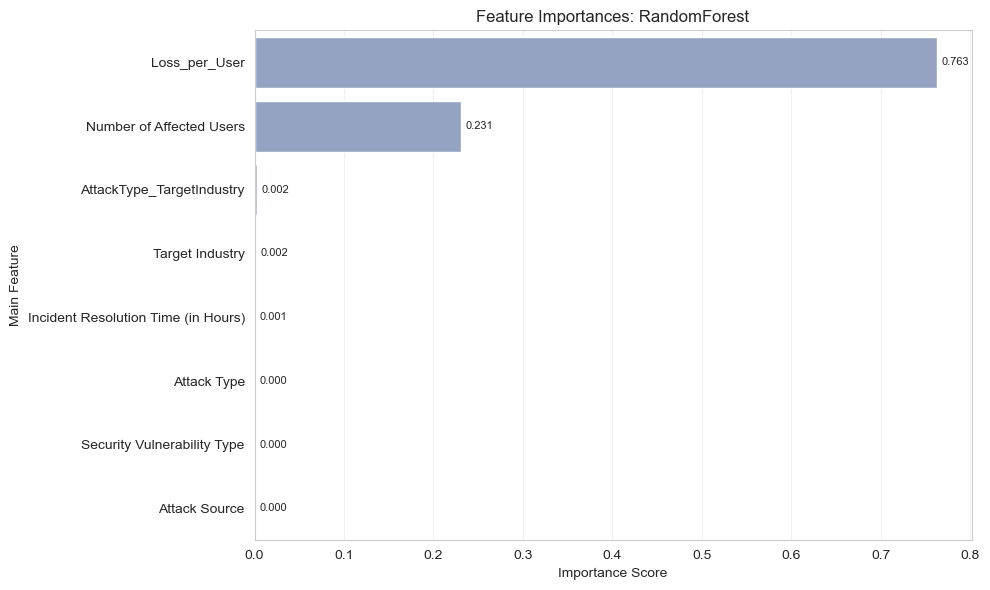

Saved plot to C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML\plots\RandomForest_feature_importance.png


In [8]:
model = joblib.load(os.path.join(MODEL_PATH, "RandomForest_tuned.joblib"))
estimator = [s for s in model.named_steps.values() if hasattr(s, "feature_importances_")][0]
feat_names = model.named_steps['preprocessor'].get_feature_names_out()
raw_imp = pd.Series(estimator.feature_importances_, index=feat_names)
plot_feature_importance(raw_imp, "RandomForest")

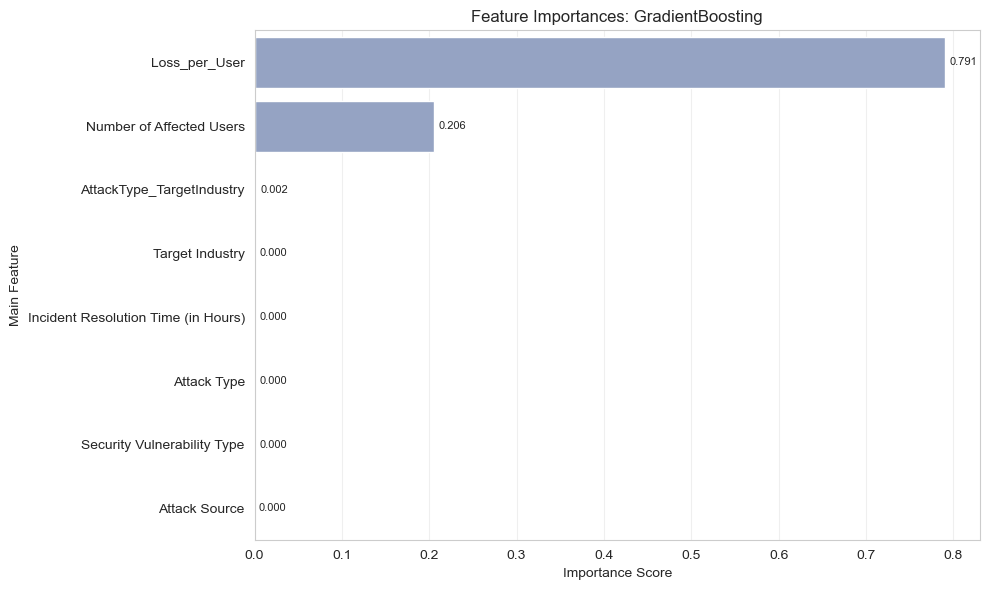

Saved plot to C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML\plots\GradientBoosting_feature_importance.png


In [9]:
model = joblib.load(os.path.join(MODEL_PATH, "GradientBoosting_tuned.joblib"))
estimator = [s for s in model.named_steps.values() if hasattr(s, "feature_importances_")][0]
feat_names = model.named_steps['preprocessor'].get_feature_names_out()
raw_imp = pd.Series(estimator.feature_importances_, index=feat_names)
plot_feature_importance(raw_imp, "GradientBoosting")

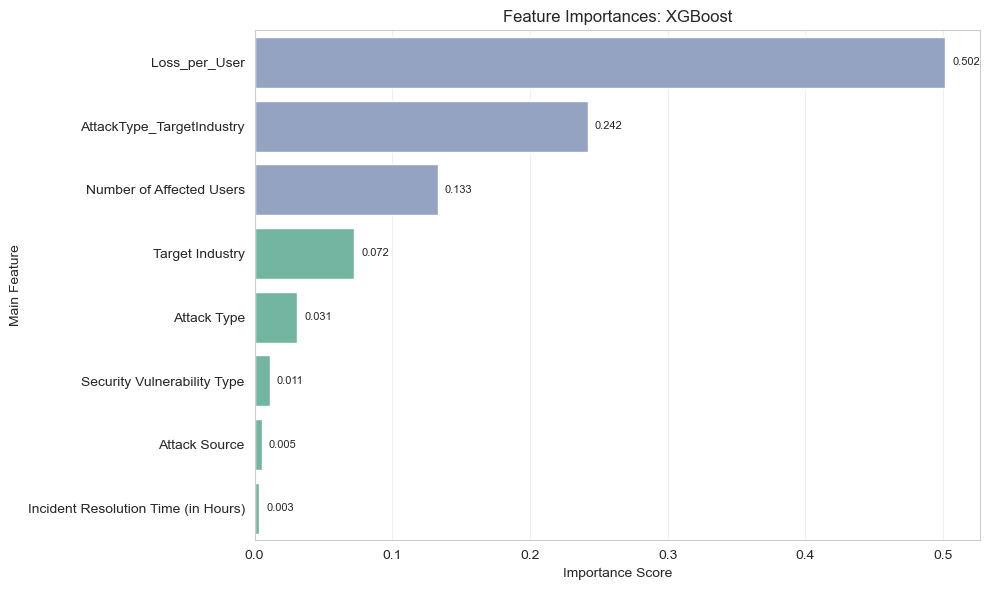

Saved plot to C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML\plots\XGBoost_feature_importance.png


In [10]:
model = joblib.load(os.path.join(MODEL_PATH, "XGBoost_tuned.joblib"))
estimator = [s for s in model.named_steps.values() if hasattr(s, "feature_importances_")][0]
feat_names = model.named_steps['preprocessor'].get_feature_names_out()
raw_imp = pd.Series(estimator.feature_importances_, index=feat_names)
plot_feature_importance(raw_imp, "XGBoost")